In [1]:
from sklearn.model_selection import train_test_split
import pandas as pn
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
from sklearn import metrics

from xgboost import XGBClassifier #定義XGBoost
import xgboost as xgb #定義XGBoost
import math #MSE公式會用到

from sklearn.ensemble import RandomForestClassifier
import pydotplus

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pwd

'C:\\Users\\user\\Documents\\GitHub\\hw2_M11023009'

In [3]:
adult_x_train = pn.read_csv('adult.data', header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])
adult_x_test = pn.read_csv('adult.test', skiprows = 1, header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])

In [4]:
adult_x_train

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
adult_x_test

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# #資料量化

In [6]:
def dataCleaning(dataSet):
    #刪去不相關欄位
    dataSet.drop('fnlwgt',axis=1, inplace=True)         
    dataSet.drop('education',axis=1, inplace=True)      
    dataSet.drop('capital-gain',axis=1, inplace=True)   
    dataSet.drop('capital-loss',axis=1, inplace=True)   
    dataSet = dataSet.replace(' ?', np.nan)
    #缺失值處理，採用眾數替換法（mode（）方法取眾數）
    dataSet.fillna(value={'workclass':dataSet['workclass'].mode()[0],   #Workclass
                          'occupation':dataSet['occupation'].mode()[0],   #Occupation  
                          'native-country':dataSet['native-country'].mode()[0]}, #Native country
              inplace = True)  
    
    #量化_換成number 0 1 2 3 (量化)
    workclass = list(set(dataSet['workclass']))
    for i in range(len(workclass)):
        row = dataSet['workclass'] == workclass[i]
        dataSet.loc[row,'workclass'] = i
    dataSet['workclass'] = dataSet['workclass'].astype(np.int64)
    
    maritalStatus = list(set(dataSet['marital-status']))
    for i in range(len(maritalStatus)):
        row = dataSet['marital-status'] == maritalStatus[i]
        dataSet.loc[row,'marital-status'] = i
    dataSet['marital-status'] = dataSet['marital-status'].astype(np.int64)
        
    occupation = list(set(dataSet['occupation']))
    for i in range(len(occupation)):
        row = dataSet['occupation'] == occupation[i]
        dataSet.loc[row,'occupation'] = i
    dataSet['occupation'] = dataSet['occupation'].astype(np.int64)
    
    relationship = list(set(dataSet['relationship']))
    for i in range(len(relationship)):
        row = dataSet['relationship'] == relationship[i]
        dataSet.loc[row,'relationship'] = i
    dataSet['relationship'] = dataSet['relationship'].astype(np.int64)
    
    race = list(set(dataSet['race']))
    for i in range(len(race)):
        row = dataSet['race'] == race[i]
        dataSet.loc[row,'race'] = i
    dataSet['race'] = dataSet['race'].astype(np.int64)
    
    sex = list(set(dataSet['sex']))
    for i in range(len(sex)):
        row = dataSet['sex'] == sex[i]
        dataSet.loc[row,'sex'] = i
    dataSet['sex'] = dataSet['sex'].astype(np.int64)
    
    nativeCountry = list(set(dataSet['native-country']))
    for i in range(len(nativeCountry)):
        row = dataSet['native-country'] == nativeCountry[i]
        dataSet.loc[row,'native-country'] = i
    dataSet['native-country'] = dataSet['native-country'].astype(np.int64)
    
    money = {' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1}
    try:
        dataSet['money'] = dataSet['money'].map(money)
    except:
        i = 1#不做處理
    else:
        i = 1
        
    
    
    return dataSet
    

In [7]:
adult_x_train = dataCleaning(adult_x_train)
adult_x_train

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,39,7,13,5,10,1,2,0,40,40,0
1,50,4,13,4,8,2,2,0,13,40,0
2,38,3,9,1,3,1,2,0,40,40,0
3,53,3,7,4,3,2,4,0,40,40,0
4,28,3,13,4,13,0,4,1,40,18,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,4,4,0,2,1,38,40,0
32557,40,3,9,4,7,2,2,0,40,40,1
32558,58,3,9,3,10,4,2,1,40,40,0
32559,22,3,9,5,10,5,2,0,20,40,0


In [8]:
adult_x_test = dataCleaning(adult_x_test)
adult_x_test

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,25,3,7,5,7,5,4,0,40,39,0
1,38,3,9,4,2,2,2,0,50,39,0
2,28,2,12,4,8,2,2,0,40,39,1
3,44,3,10,4,7,2,4,0,40,39,1
4,18,3,10,5,13,5,2,1,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,13,1,13,1,2,1,36,39,0
16277,64,3,9,3,13,3,4,0,40,39,0
16278,38,3,13,4,13,2,2,0,50,39,0
16279,44,3,13,1,10,5,1,0,40,39,0


In [9]:
adult_x_train.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [10]:
adult_x_test.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [11]:
adult_x_test.dtypes

age               int64
workclass         int64
education_num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours-per-week    int64
native-country    int64
money             int64
dtype: object

In [12]:
#載入KNN分類法的距離

scaler = StandardScaler()
scaler.fit(adult_x_train.drop('hours-per-week',axis=1))
scaled_features = scaler.transform(adult_x_train.drop('hours-per-week',axis=1))
adult_x_train_feat = pn.DataFrame(scaled_features,columns=adult_x_train.columns[:-1])
adult_x_train_feat


,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.030671,3.809673,1.134739,0.875864,0.576285,-0.920535,-0.231759,-0.703071,0.273101,-0.563199
1,0.837109,0.831049,1.134739,0.181802,0.135148,-0.242355,-0.231759,-0.703071,0.273101,-0.563199
2,-0.042642,-0.161825,-0.420060,-1.900384,-0.967694,-0.920535,-0.231759,-0.703071,0.273101,-0.563199
3,1.057047,-0.161825,-1.197459,0.181802,-0.967694,-0.242355,2.800107,-0.703071,0.273101,-0.563199
4,-0.775768,-0.161825,1.134739,0.181802,1.237991,-1.598715,2.800107,1.422331,-2.849544,-0.563199
...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.161825,0.746039,0.181802,-0.747126,-1.598715,-0.231759,1.422331,0.273101,-0.563199
32557,0.103983,-0.161825,-0.420060,0.181802,-0.085420,-0.242355,-0.231759,-0.703071,0.273101,1.775573
32558,1.423610,-0.161825,-0.420060,-0.512260,0.576285,1.114006,-0.231759,1.422331,0.273101,-0.563199
32559,-1.215643,-0.161825,-0.420060,0.875864,0.576285,1.792187,-0.231759,-0.703071,0.273101,-0.563199


In [13]:
#設定答案
adult_y_train = adult_x_train.pop('hours-per-week')
adult_y_test = adult_x_test.pop('hours-per-week')

In [14]:
adult_y_train

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 32561, dtype: int64

In [15]:
adult_y_test

0        40
1        50
2        40
3        40
4        30
         ..
16276    36
16277    40
16278    50
16279    40
16280    60
Name: hours-per-week, Length: 16281, dtype: int64

In [16]:
adult_x_train

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,native-country,money
0,39,7,13,5,10,1,2,0,40,0
1,50,4,13,4,8,2,2,0,40,0
2,38,3,9,1,3,1,2,0,40,0
3,53,3,7,4,3,2,4,0,40,0
4,28,3,13,4,13,0,4,1,18,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,4,4,0,2,1,40,0
32557,40,3,9,4,7,2,2,0,40,1
32558,58,3,9,3,10,4,2,1,40,0
32559,22,3,9,5,10,5,2,0,40,0


# #SVR

In [17]:
clf = SVR().fit(adult_x_train, adult_y_train)

In [18]:
adult_y_predict = clf.predict(adult_x_test)

In [19]:
print("準確率：", clf.score(adult_x_test, adult_y_test))

準確率： 0.0723729754679413


In [20]:
def MAPE(y_test,y_Predicted):
    mape = np.mean(np.abs((y_test - y_Predicted)/y_test))*100
    return mape

In [21]:
print("RMSE:",np.sqrt(MSE(adult_y_test,adult_y_predict)))
print("MAE:",MAE(adult_y_test,adult_y_predict))
print("MAPE:",MAPE(adult_y_test,adult_y_predict),"%")

RMSE: 12.018899557745515
MAE: 7.371257111139202
MAPE: 33.72234422605543 %


Text(0, 0.5, 'hours-per-week')

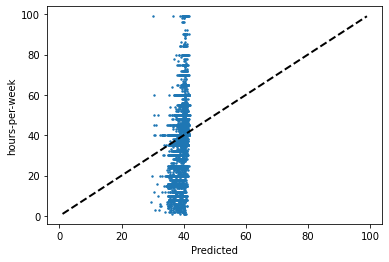

In [22]:
plt.scatter(adult_y_predict,adult_y_test,s=2)
plt.plot([adult_y_test.min(), adult_y_test.max()], [adult_y_test.min(), adult_y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('hours-per-week')

## XGBOOST

In [23]:
# 建立 XGBClassifier 模型  #決策樹的個數#預測值為100 #學習速率0.3 #測試0.1~1, 0.2的測試集最高
xgboostModel = XGBClassifier(n_estimators=100,learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(adult_x_train,adult_y_train)
# 使用訓練資料預測分類
pre = xgboostModel.predict(adult_x_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
#確認訓練集測試集的資料準確率
print('訓練集',xgboostModel.score(adult_x_train ,adult_y_train))
print('測試集',xgboostModel.score(adult_x_test ,adult_y_test))


訓練集 0.49411873099720527
測試集 0.3975800012284258


# #RMSE

In [25]:
print("RMSE:",np.sqrt(MSE(adult_y_test,pre)))
print("MAE:",MAE(adult_y_test,pre))
print("MAPE:",MAPE(adult_y_test,pre),"%")

RMSE: 12.809794771418742
MAE: 7.956206621214913
MAPE: 32.8374672282323 %


## 隨機森林

# 利用隨機森林分類器並決定決策數的棵樹、剪枝葉

In [26]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rfc.fit(adult_x_train,adult_y_train)

RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=50)

# 用建好的模型來預測資料

In [27]:
y_predict = rfc.predict(adult_x_test)
y_predict

array([40, 40, 40, ..., 40, 40, 50], dtype=int64)

# 檢驗模型正確率

In [28]:
rfc.score(adult_x_test,adult_y_test) #準確率

0.47042564953012717

In [29]:
#RMSE、MAE、MAPE績效

In [30]:
print("RMSE:",np.sqrt(MSE(adult_y_test,y_predict)))
print("MAE:",MAE(adult_y_test,y_predict))
print("MAPE:",MAPE(adult_y_test,y_predict),"%")

RMSE: 12.012242184010809
MAE: 7.0909649284441985
MAPE: 32.356986793516796 %


## KNN

In [31]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = adult_x_train_feat
y = adult_y_train
adult_x_train, adult_x_test, adult_y_train, adult_y_test = train_test_split(X,y,test_size=0.2)

In [32]:
#利用迴圈，選擇k值
from sklearn.neighbors import KNeighborsClassifier
mae = []
rmse = []
mape = []


for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(adult_x_train,adult_y_train)
  pred= knn.predict(adult_x_test)


  mae.append(metrics.mean_absolute_error(adult_y_test,pred))

  mse = metrics.mean_squared_error(adult_y_test,pred) 
  rmse.append(np.sqrt(mse))



  mape.append(np.mean(np.abs((adult_y_test - pred)/adult_y_test))*100)





Text(0, 0.5, 'MAE')

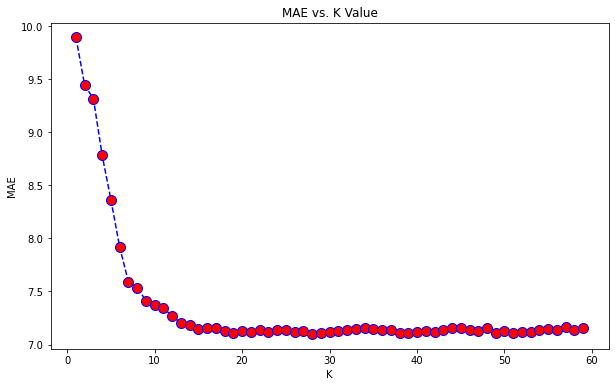

In [33]:
#將k=1~60的MAE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),mae,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('MAE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

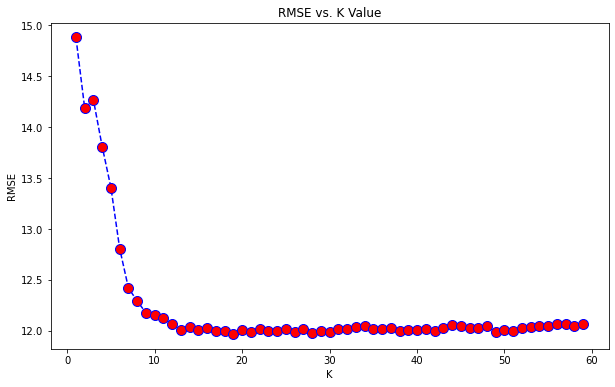

In [34]:
#將k=1~60的RMSE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),rmse,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAPE(%)')

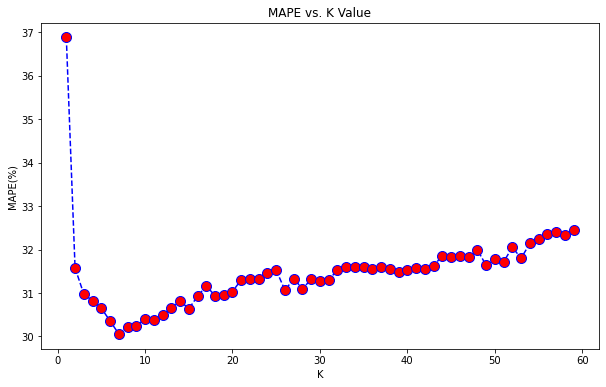

In [35]:
#將k=1~60的MAPE製圖畫出。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),mape,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('MAPE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAPE(%)')